In [191]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [192]:
os.chdir('c:\\Users\\Njaal\\OneDrive\\Dokumenter\\Privat\\Njål J. Wiik\\Data analyse\\Data')

In [193]:
header = ['party',
 'infants',
 'water',
 'budget',
 'physician',
 'salvador',
 'religious',
 'satellite',
 'aid',
 'missile',
 'immigration',
 'synfuels',
 'education',
 'superfund',
 'crime',
 'duty_free_exports',
 'eaa_rsa']
header1 = [
 'infants',
 'water',
 'budget',
 'physician',
 'salvador',
 'religious',
 'satellite',
 'aid',
 'missile',
 'immigration',
 'synfuels',
 'education',
 'superfund',
 'crime',
 'duty_free_exports',
 'eaa_rsa']

In [194]:
df = pd.read_csv("house-votes-84.csv", header = None, names = header)

In [195]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [196]:
df = df[df[header] != "?"]


In [197]:
df = df.dropna()

In [198]:
df[header1] = df[header1].eq('y').mul(1)

In [199]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


In [200]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


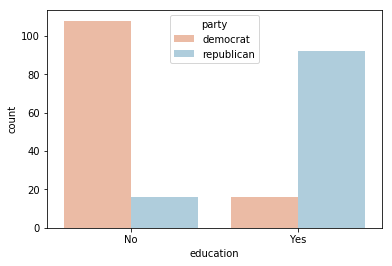

In [201]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [202]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [238]:
y_pred = knn.predict(X)

In [245]:
'''Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to 
fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, 
unseen data.Will need a solution to this problem. For now, a random unlabeled data point will be generated as X_new. 
You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. 
Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.'''
X_new = [[0.041952, 0.011939,  0.11402,  0.842204,  0.186503,  0.749725,  0.721634,
0.210056,  0.558629,  0.996389,  0.525752,  0.513292,  0.93427,  0.014781,   
0.139773,  0.780768]]
pd.DataFrame(X_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.041952,0.011939,0.11402,0.842204,0.186503,0.749725,0.721634,0.210056,0.558629,0.996389,0.525752,0.513292,0.93427,0.014781,0.139773,0.780768


In [247]:
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))
print("Prediction: {}".format(y_pred))

Prediction: ['republican']
Prediction: ['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'republican' 'republican' 'republican' 'republican' 'democrat'
 'republican' 'republican' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'republican'
 'republican' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'democrat' 'republican' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'republican' 'republican'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'republican' 'republican